# Data Analysis
## Class 9
### Covariance matrix and correlation matrix
#### October 2nd

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import os
import numpy as np

In [2]:
mpg = pd.read_csv('mpg_raw.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
data = mpg[['mpg', 'horsepower', 'weight']]
data

,mpg,horsepower,weight
0,18.0,130.0,3504
1,15.0,165.0,3693
2,18.0,150.0,3436
3,16.0,150.0,3433
4,17.0,140.0,3449
...,...,...,...
393,27.0,86.0,2790
394,44.0,52.0,2130
395,32.0,84.0,2295
396,28.0,79.0,2625


In [6]:
px.scatter(data, x='horsepower', y='mpg')

In [7]:
px.scatter(data, x='weight', y='mpg')

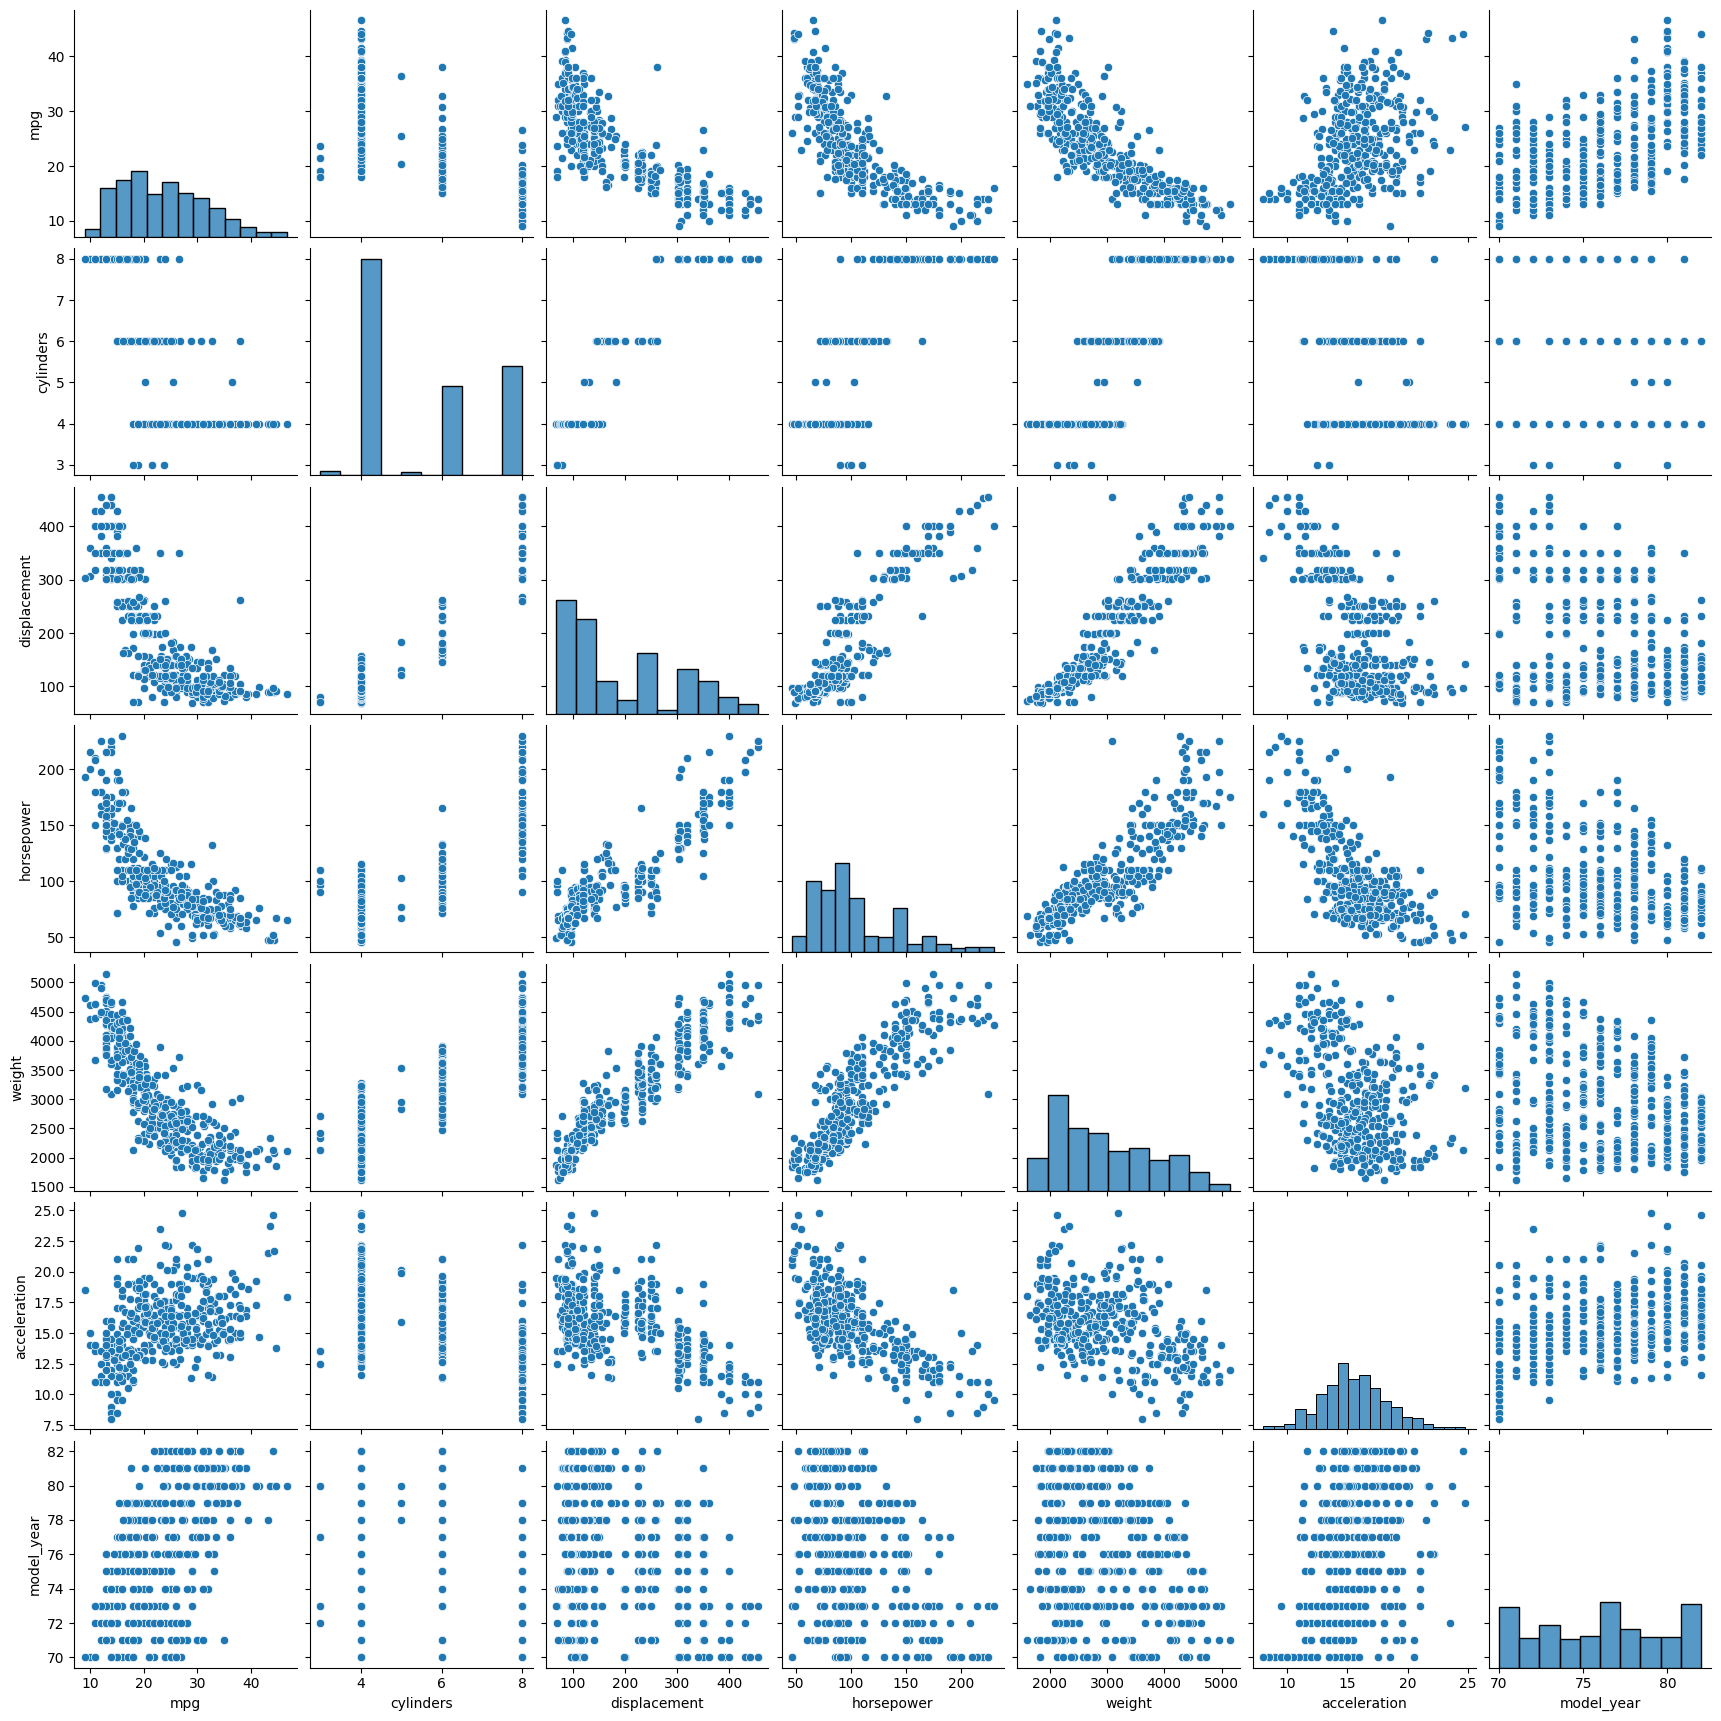

In [8]:
sns.pairplot(mpg)

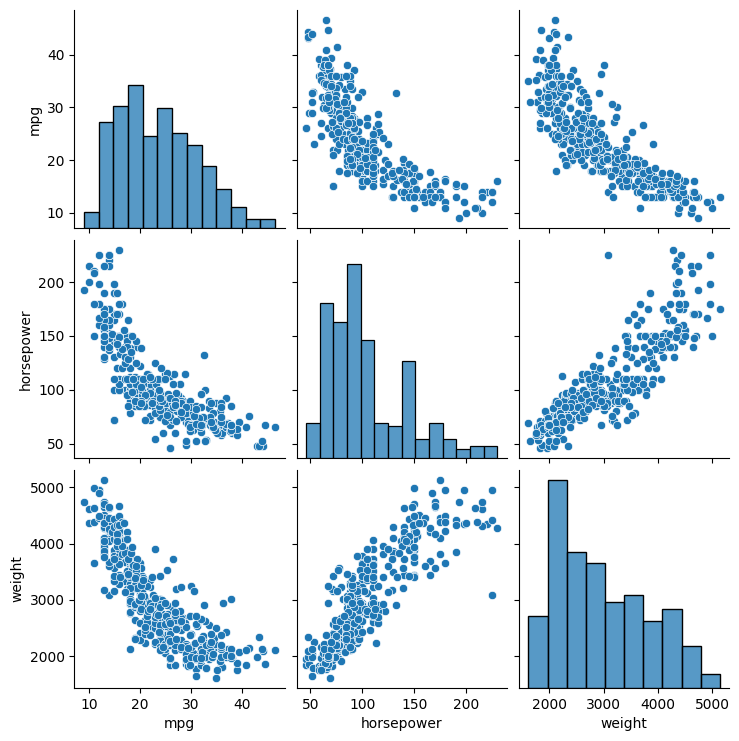

In [9]:
sns.pairplot(data)

.corr() return the correlation matrix

In [10]:
data[['weight', 'horsepower']].corr()

,weight,horsepower
weight,1.000000,0.864538
horsepower,0.864538,1.000000


.cov() return de covariance matrix

In [11]:
data[['weight', 'horsepower']].cov()

,weight,horsepower
weight,717140.990526,28265.620231
horsepower,28265.620231,1481.569393


In [12]:
data[['weight', 'mpg']].corr()

,weight,mpg
weight,1.000000,-0.831741
mpg,-0.831741,1.000000


In [13]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


# Data Analysis
## Class 10
### Linear Regression
#### October 4th

In [14]:
train = data[['mpg', 'horsepower', 'weight']]

We can see which cells haven't values

In [15]:
train[train.isna().any(axis=1)]

,mpg,horsepower,weight
32,25.0,NaN,2046
126,21.0,NaN,2875
330,40.9,NaN,1835
336,23.6,NaN,2905
354,34.5,NaN,2320
374,23.0,NaN,3035


In [16]:
train[train.isnull().any(axis=1)]

,mpg,horsepower,weight
32,25.0,NaN,2046
126,21.0,NaN,2875
330,40.9,NaN,1835
336,23.6,NaN,2905
354,34.5,NaN,2320
374,23.0,NaN,3035


In [17]:
train = train.dropna()

In [18]:
train[train.isnull().any(axis=1)]

,mpg,horsepower,weight


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
y = train.iloc[:,0].values.reshape(-1, 1)
y

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17. ],
       [11

In [21]:
x = train.iloc[:,1:].values
x

array([[ 130., 3504.],
       [ 165., 3693.],
       [ 150., 3436.],
       [ 150., 3433.],
       [ 140., 3449.],
       [ 198., 4341.],
       [ 220., 4354.],
       [ 215., 4312.],
       [ 225., 4425.],
       [ 190., 3850.],
       [ 170., 3563.],
       [ 160., 3609.],
       [ 150., 3761.],
       [ 225., 3086.],
       [  95., 2372.],
       [  95., 2833.],
       [  97., 2774.],
       [  85., 2587.],
       [  88., 2130.],
       [  46., 1835.],
       [  87., 2672.],
       [  90., 2430.],
       [  95., 2375.],
       [ 113., 2234.],
       [  90., 2648.],
       [ 215., 4615.],
       [ 200., 4376.],
       [ 210., 4382.],
       [ 193., 4732.],
       [  88., 2130.],
       [  90., 2264.],
       [  95., 2228.],
       [ 100., 2634.],
       [ 105., 3439.],
       [ 100., 3329.],
       [  88., 3302.],
       [ 100., 3288.],
       [ 165., 4209.],
       [ 175., 4464.],
       [ 153., 4154.],
       [ 150., 4096.],
       [ 180., 4955.],
       [ 170., 4746.],
       [ 17

In [22]:
import matplotlib.pyplot as plt

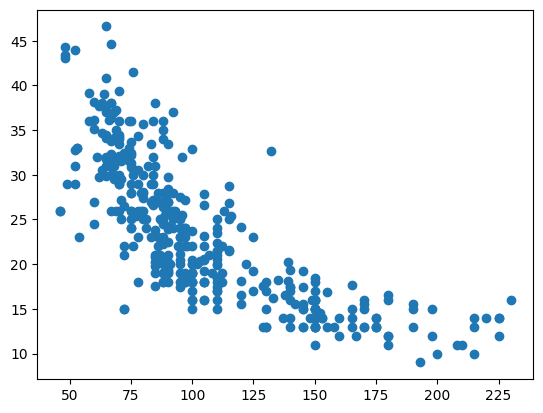

In [23]:
plt.scatter(x[:,0], y)

$mpg = B_{0} + B_{1}hp$

hp = x[:,0]

$mpg = B_{0}$ + B_{1}w$

w = x[:,1]

$mpg = B_{0} + B_{1}hp + B_{2}w$

Fit Linear Model to mpg using horse power

In [24]:
lm = LinearRegression()
lm.fit(x[:,0].reshape(-1, 1), y)

LinearRegression()

$B_{1}$ is obtain by the function lm.coef_ is m in the equation $y = b +mx$

In [25]:
lm.coef_

array([[-0.15784473]])

$B_{0}$ is obtain by the function lm.intercept_ is b in the equation $y = b +mx$

In [26]:
lm.intercept_

array([39.93586102])

In [27]:
y_pred = lm.predict(x[:,0].reshape(-1, 1))
y_pred

array([[19.41604569],
       [13.89148002],
       [16.25915102],
       [16.25915102],
       [17.83759835],
       [ 8.68260382],
       [ 5.21001968],
       [ 5.99924335],
       [ 4.42079602],
       [ 9.94536168],
       [13.10225635],
       [14.68070368],
       [16.25915102],
       [ 4.42079602],
       [24.94061135],
       [24.94061135],
       [24.62492189],
       [26.51905869],
       [26.04552449],
       [32.67500329],
       [26.20336922],
       [25.72983502],
       [24.94061135],
       [22.09940615],
       [25.72983502],
       [ 5.99924335],
       [ 8.36691435],
       [ 6.78846702],
       [ 9.47182748],
       [26.04552449],
       [25.72983502],
       [24.94061135],
       [24.15138769],
       [23.36216402],
       [24.15138769],
       [26.04552449],
       [24.15138769],
       [13.89148002],
       [12.31303268],
       [15.78561682],
       [16.25915102],
       [11.52380902],
       [13.10225635],
       [12.31303268],
       [22.57294035],
       [28

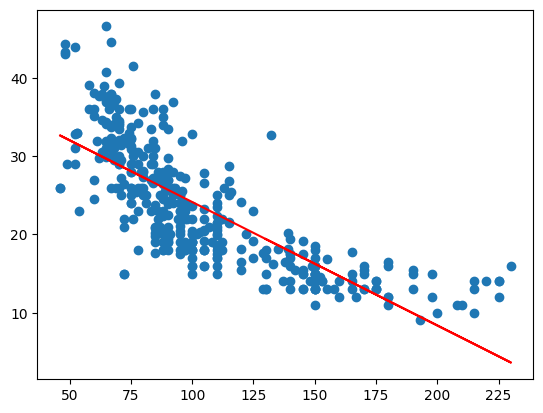

In [28]:
plt.scatter(x[:,0], y)
plt.plot(x[:,0], y_pred, color='red')

Fit Linear Model to mpg using weight

[[-0.00764734]]
[46.21652455]


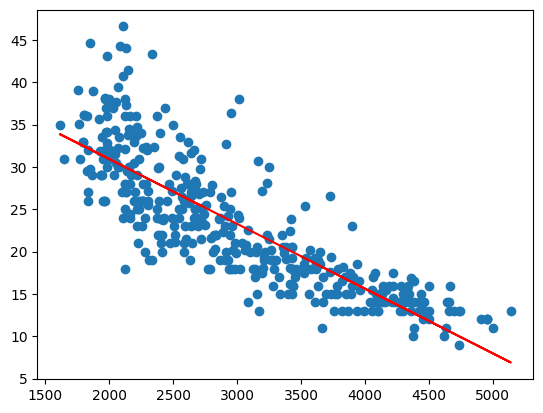

In [29]:
lm = LinearRegression()
lm.fit(x[:,1].reshape(-1,1), y)
print(lm.coef_)
print(lm.intercept_)
mpg_pred_w = lm.predict(x[:,1].reshape(-1,1))
plt.scatter(x[:,1], y)
plt.plot(x[:,1], mpg_pred_w, color='red')

Fit Linear Model to mpg using horsepower

[[-0.15784473]]
[39.93586102]


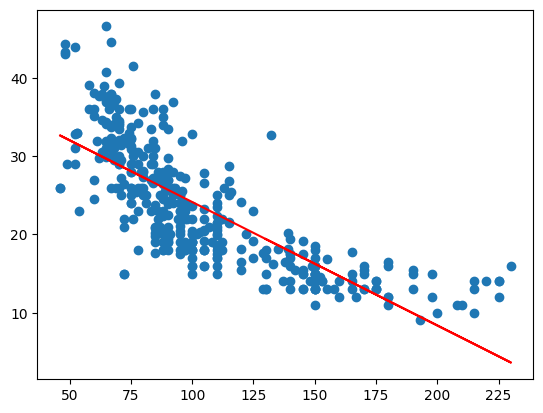

In [30]:
lm = LinearRegression()
lm.fit(x[:,0].reshape(-1,1), y)
print(lm.coef_)
print(lm.intercept_)
mpg_pred_hp = lm.predict(x[:,0].reshape(-1,1))
plt.scatter(x[:,0], y)
plt.plot(x[:,0], mpg_pred_hp, color='red')

Let's use the matrix equation to solve the problem

In [31]:
y = train['mpg']

In [32]:
xt = train[['horsepower', 'weight']]
xt['bias'] = 1.
xt

,horsepower,weight,bias
0,130.0,3504,1.0
1,165.0,3693,1.0
2,150.0,3436,1.0
3,150.0,3433,1.0
4,140.0,3449,1.0
...,...,...,...
393,86.0,2790,1.0
394,52.0,2130,1.0
395,84.0,2295,1.0
396,79.0,2625,1.0


In [33]:
xt.T

,0,1,2,3,4,5,6,7,8,9,...,388,389,390,391,392,393,394,395,396,397
horsepower,130.0,165.0,150.0,150.0,140.0,198.0,220.0,215.0,225.0,190.0,...,92.0,112.0,96.0,84.0,90.0,86.0,52.0,84.0,79.0,82.0
weight,3504.0,3693.0,3436.0,3433.0,3449.0,4341.0,4354.0,4312.0,4425.0,3850.0,...,2585.0,2835.0,2665.0,2370.0,2950.0,2790.0,2130.0,2295.0,2625.0,2720.0
bias,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [34]:
a = (xt.T).dot(xt)
print(a.values)
a_inv = np.linalg.inv(a)
print(a_inv)

[[4.85752400e+06 1.32989885e+08 4.09520000e+04]
 [1.32989885e+08 3.75757549e+09 1.16721300e+06]
 [4.09520000e+04 1.16721300e+06 3.92000000e+02]]
[[ 6.83457860e-06 -2.67758417e-07  8.32689839e-05]
 [-2.67758417e-07  1.40348123e-08 -1.38172773e-05]
 [ 8.32689839e-05 -1.38172773e-05  3.49940670e-02]]


This is almost the identity matrix

In [35]:
a_inv.dot(a) 

array([[ 1.00000000e+00,  2.83339771e-13,  9.59518923e-17],
       [-9.07206168e-17,  1.00000000e+00, -2.52077005e-18],
       [-1.34614542e-13, -5.05914755e-14,  1.00000000e+00]])

Right hand side

In [36]:
rhs = xt.T.dot(y).values

Coeficients $B_{1}$, $B_{2}$, $B_{0}$

In [37]:
a_inv.dot(rhs)

array([-4.73028631e-02, -5.79415736e-03,  4.56402108e+01])

In [38]:
xt.drop(columns='bias').values

array([[ 130., 3504.],
       [ 165., 3693.],
       [ 150., 3436.],
       [ 150., 3433.],
       [ 140., 3449.],
       [ 198., 4341.],
       [ 220., 4354.],
       [ 215., 4312.],
       [ 225., 4425.],
       [ 190., 3850.],
       [ 170., 3563.],
       [ 160., 3609.],
       [ 150., 3761.],
       [ 225., 3086.],
       [  95., 2372.],
       [  95., 2833.],
       [  97., 2774.],
       [  85., 2587.],
       [  88., 2130.],
       [  46., 1835.],
       [  87., 2672.],
       [  90., 2430.],
       [  95., 2375.],
       [ 113., 2234.],
       [  90., 2648.],
       [ 215., 4615.],
       [ 200., 4376.],
       [ 210., 4382.],
       [ 193., 4732.],
       [  88., 2130.],
       [  90., 2264.],
       [  95., 2228.],
       [ 100., 2634.],
       [ 105., 3439.],
       [ 100., 3329.],
       [  88., 3302.],
       [ 100., 3288.],
       [ 165., 4209.],
       [ 175., 4464.],
       [ 153., 4154.],
       [ 150., 4096.],
       [ 180., 4955.],
       [ 170., 4746.],
       [ 17

scikitlearn aggregate the bias automatically, so we have to drop it

In [39]:
lm = LinearRegression()
lm.fit(xt.drop(columns='bias').values, y)
print(lm.coef_)
print(lm.intercept_)

[-0.04730286 -0.00579416]
45.640210840177126


Homework

In [54]:
y.shape

(392,)

In [55]:
n1 = np.ones_like(y)
n1.shape

(392,)

In [56]:
np.dot(n1.T, n1)

392.0

In [64]:
(1/np.dot(n1.T, n1))*np.dot(n1.T, y)

23.44591836734694

In [62]:
y.mean()

23.445918367346938

In [63]:
y.sum()/len(y)

23.445918367346938

In [66]:
len(x)

392

In [70]:
i = np.identity(len(x))

In [74]:
np.dot(np.dot(x.T, i-n1*(1/len(x))*n1.T), x)

array([[5.79293633e+05, 1.10518575e+07],
       [1.10518575e+07, 2.82100521e+08]])

In [78]:
pd.DataFrame(x).cov()

,0,1
0,1481.569393,28265.620231
1,28265.620231,721484.709008
